In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv(r"C:\Users\yits0\Downloads\archive\Advertising.csv")

print("Dataset Preview:")
print(data.head())

Dataset Preview:
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [5]:
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None


In [6]:
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


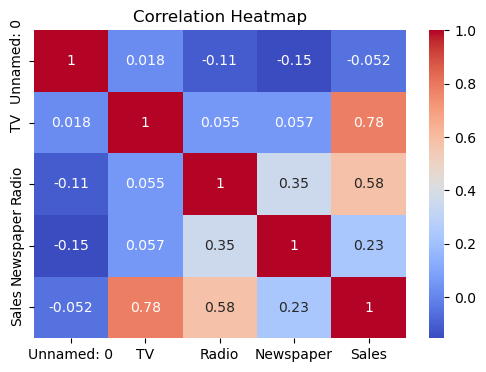

In [7]:
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [9]:
X = data[['TV' , 'Radio' , 'Newspaper']]
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nModel Performance:")
print("Mean Squared Error (MSE):",mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Model Performance:
Mean Squared Error (MSE): 3.1740973539761015
R2 Score: 0.8994380241009121


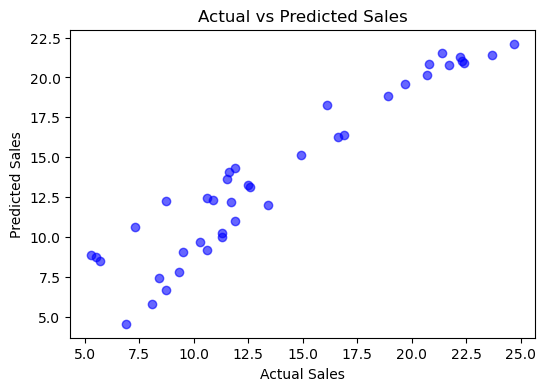

In [10]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

In [11]:
example = pd.DataFrame([[230, 37, 69]], columns=['TV','Radio','Newspaper'])
predicted_sales = model.predict(example)[0]
print("\nPredicted Sales for TV=230, Radio=37, Newspaper=69:",predicted_sales)


Predicted Sales for TV=230, Radio=37, Newspaper=69: 20.45759025215365
